## Graphs in NetworkX
NetworkX provides data structures for graphs along with graph algorithms, generators, and drawing tools.
The following basic graph types are provided as Python classes:

**Graph.** This class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself.

**DiGraph.** Directed graphs, that is, graphs with directed edges. 

**MultiGraph.** A flexible graph class that allows multiple undirected edges between pairs of nodes. The additional flexibility leads to some degradation in performance, though usually not significant.

**MultiDiGraph.** A directed version of a MultiGraph.

## Creating a graph

Create an empty graph with no nodes and no edges.

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()
G = nx.DiGraph()
G = nx.MultiGraph()
G = nx.MultiDiGraph()

By definition, a `Graph` is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object (an object is hashable if it has a hash value which never changes during its lifetime and can be compared to other objects), e.g., an integer, a text string, an image, an XML object, another Graph, a customized node object, etc. Arbitrary edge attributes such as weights and labels can be associated with an edge.

The first choice to be made when using NetworkX is what type of graph object to use. A graph is a collection of nodes together with a collection of edges that are pairs of nodes. Attributes are often associated with nodes and/or edges. NetworkX graph objects come in different flavors depending on two main properties of the network:

Directed: Are the edges directed? Does the order of the edge pairs (u,v) matter? A directed graph is specified by the “Di” prefix in the class name, e.g., DiGraph(). We make this distinction because many classical graph properties are defined differently for directed graphs.

Multi-edges: Are multiple edges allowed between each pair of nodes? As you might imagine, multiple edges requires a different data structure, though tricky users could design edge data objects to support this functionality. The standard data structure and interface for this type of graph is provided using the prefix “Multi”, e.g., MultiGraph().

## Nodes

The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started though we'll look at simple manipulations. You can add one node at a time,

In [3]:
G = nx.Graph()
G.add_node(1)

add a list of nodes,

In [4]:
G.add_nodes_from([2, 3])

or add any `nbunch` of nodes. An nbunch is any iterable container of nodes that is not itself a node in the graph. (e.g. a list, set, graph, file, etc..)

In [5]:
H = nx.path_graph(10)

In [6]:
G.add_nodes_from(H)

Note that G now contains the nodes of H as nodes of G. In contrast, you could use the graph H as a node in G.

In [7]:
G.add_node(H)

The graph G now contains H as a node. This flexibility is very powerful as it allows graphs of graphs, graphs of files, graphs of functions and much more. It is worth thinking about how to structure your application so that the nodes are useful entities. 

## Edges

G can also be grown by adding one edge at a time,

In [8]:
G.add_edge(1, 2)

In [9]:
e = (2, 3)

In [10]:
G.add_edge(*e) # unpack edge tuple*

by adding a list of edges,

In [11]:
G.add_edges_from([(1, 2),(1, 3)])

or by adding any `ebunch` of edges. An ebunch is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g. (2, 3, {'weight' : 3.1415}). Edge attributes are discussed further below

In [12]:
G.add_edges_from(H.edges())

One can demolish the graph in a similar fashion; using `Graph.remove_node`, `Graph.remove_nodes_from`, `Graph.remove_edge` and `Graph.remove_edges_from`, e.g.

In [13]:
G.remove_node(H)

In [14]:
G.clear()

We can now add new nodes/edges.

In [16]:
G.add_edges_from([(1, 2), (1, 3)])

In [17]:
G.add_node(1)

In [18]:
G.add_edge(1, 2)

In [19]:
G.add_node("spam")       # adds node "spam"

In [20]:
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

At this stage the graph G consists of 8 nodes and 2 edges, as can be seen by:

In [21]:
G.number_of_nodes()

8

In [22]:
G.number_of_edges()

2

We can examine the nodes and edges. Four basic graph properties facilitate reporting: G.nodes, G.edges, G.adj and G.degree. These are set-like views of the nodes, edges, neighbors (adjacencies), and degrees of nodes in a graph. They offer a continually updated read-only view into the graph structure. 

In [23]:
list(G.nodes())  # G.nodes() returns an iterator of nodes.

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [24]:
list(G.edges())  # G.edges() returns an iterator of edges.

[(1, 2), (1, 3)]

In [25]:
list(G.adj[1])  # G.adj(n) returns an iterator of neigboring nodes of n

[2, 3]

In [31]:
G.degree(1)

2

Removing nodes or edges has similar syntax to adding:

In [68]:
G.remove_nodes_from("spam")

In [69]:
list(G.nodes())

[1, 2, 3, 'spam']

In [34]:
G.remove_edge(1, 3)

When creating a graph structure by instantiating one of the graph classes, you can specify data in several formats.

In [35]:
H = nx.DiGraph(G)  # create a DiGraph using the connections from G

In [36]:
list(H.edges())

[(1, 2), (2, 1)]

In [37]:
edgelist = [(0, 1), (1, 2), (2, 3)]

In [38]:
H = nx.Graph(edgelist)

## What to use as nodes and edges

You might notice that nodes and edges are not specified as NetworkX objects. This leaves you free to use meaningful items as nodes and edges. The most common choices are numbers or strings, but a node can be any hashable object (except None), and an edge can be associated with any object x using `G.add_edge(n1, n2, object=x)`.

As an example, n1 and n2 could be users in a social network, and x could refer to the relationship that links them (e.g., friends, colleagues, relatives).

We have found this power quite useful, but its abuse can lead to unexpected surprises unless one is familiar with Python. If in doubt, consider using `convert_node_labels_to_integers` to obtain a more traditional graph with integer labels.

## Accessing edges

In addition to the methods `Graph.nodes`, `Graph.edges`, and `Graph.neighbors`, iterator versions (e.g. `Graph.edges_iter`) can save you from creating large lists when you are just going to iterate through them anyway.

Fast direct access to the graph data structure is also possible using subscript notation.

Warning

Do not change the returned dict--it is part of the graph data structure and direct manipulation may leave the graph in an inconsistent state.

In [39]:
G[1]  # Warning: do not change the resulting dict

{2: {}}

In [40]:
G[1][2]

{}

You can safely set the attributes of an edge using subscript notation if the edge already exists.

In [41]:
G.add_edge(1, 3)

In [44]:
G[1][3]['color']='blue'
G[1]

{2: {}, 3: {'color': 'blue'}}

Fast examination of all edges is achieved using adjacency (iterators). Note that for undirected graphs this actually looks at each edge twice.

In [46]:
FG = nx.Graph()

In [50]:
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2 ,4 , 1.2), (3 ,4 , 0.375)])

[(1, 2), (1, 3), (2, 4), (3, 4)]

In [48]:
for n,nbrs in FG.adj.items():
    for nbr,attr in nbrs.items():
        data = attr['weight']
        if data < 0.5:
            print('(%d, %d, %.3f)' % (n, nbr, data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


Convenient access to all edges is achieved with the edges method.

In [56]:
for (u, v, d) in FG.edges(data='weight'):
    if d < 0.5:
        print('(%d, %d, %.3f)'%(u, v, d))

(1, 2, 0.125)
(3, 4, 0.375)


## Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary. By default these are empty, but attributes can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named G.graph, G.node and G.edge for a graph G.


### Graph attributes

Assign graph attributes when creating a new graph

In [57]:
G = nx.Graph(day="Friday")

In [58]:
G.graph

{'day': 'Friday'}

Or you can modify attributes later

In [59]:
G.graph['day'] = 'Monday'

In [60]:
G.graph

{'day': 'Monday'}

### Node attributes

Add node attributes using `add_node(), add_nodes_from() or G.node`

In [61]:
G.add_node(1, time='5pm')

In [69]:
G.add_nodes_from([3], time='2pm')

In [70]:
G.node[1]

{'room': 714, 'time': '5pm'}

In [65]:
G.node[1]['room'] = 714

In [66]:
list(G.nodes(data=True))

[(1, {'room': 714, 'time': '5pm'}), (3, {'time': '2pm'})]

Note that adding a node to `G.node` does not add it to the graph, use `G.add_node()` to add new nodes.

### Edge attributes

Add edge attributes using `add_edge()`, `add_edges_from()`, subscript notation, or `G.edge`.

In [82]:
G.add_edge(1, 2, weight=4.7)

In [83]:
G.add_edges_from([(3, 4), (4, 5)], color='red')

In [84]:
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

In [85]:
G[1][2]['weight'] = 4.7

In [86]:
G.edge[1][2]['weight'] = 4

In [87]:
list(G.edges(data=True))

[(1, 2, {'color': 'blue', 'weight': 4}),
 (3, 4, {'color': 'red'}),
 (3, 2, {'weight': 8}),
 (4, 5, {'color': 'red'})]

The special attribute 'weight' should be numeric and holds values used by algorithms requiring weighted edges.

## Directed Graphs

The `DiGraph` class provides additional methods specific to directed edges, e.g. :meth:`DiGraph.out_edges`, `DiGraph.in_degree`, `DiGraph.predecessors`, `DiGraph.successors` etc. 

In [88]:
DG = nx.DiGraph()

In [89]:
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

In [90]:
DG.out_degree(1, weight='weight')

0.5

In [91]:
DG.degree(1,weight='weight')

1.25

In [92]:
list(DG.successors(1))   # DG.successors(n) returns an iterator

[2]

In [93]:
list(DG.neighbors(1))   # DG.neighbors(n) returns an iterator

[2]

Some algorithms work only for directed graphs and others are not well defined for directed graphs. Indeed the tendency to lump directed and undirected graphs together is dangerous. If you want to treat a directed graph as undirected for some measurement you should probably convert it using `Graph.to_undirected` or with

In [94]:
H = nx.Graph(G) # convert G to undirected graph

## MultiGraphs

NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. The `MultiGraph` and `MultiDiGraph` classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Shortest path is one example. Where results are well defined, e.g. `MultiGraph.degree` we provide the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined.

In [95]:
MG = nx.MultiGraph()

In [96]:
MG.add_weighted_edges_from([(1, 2, .5), (1, 2, .75), (2, 3, .5)])

In [99]:
list(MG.degree())  # MG.degree() returns a (node, degree) iterator

[1, 2, 3]

In [100]:
GG = nx.Graph()

In [103]:
for n,nbrs in MG.adj.items():
    for nbr,edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n,nbr, weight = minvalue)

In [104]:
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

## Graph generators and graph operations

In addition to constructing graphs node-by-node or edge-by-edge, they can also be generated by

* Applying classic graph operations, such as:
```
subgraph(G, nbunch)      - induce subgraph of G on nodes in nbunch
union(G1,G2)             - graph union
disjoint_union(G1,G2)    - graph union assuming all nodes are different
compose(G1,G2)           - combine graphs identifying nodes common to both
complement(G)            - graph complement
create_empty_copy(G)     - return an empty copy of the same graph class
convert_to_undirected(G) - return an undirected representation of G
convert_to_directed(G)   - return a directed representation of G
```

* Using a (constructive) generator for a classic graph, e.g.,

In [71]:
K_5 = nx.complete_graph(5)

In [115]:
K_3_5 = nx.complete_bipartite_graph(3, 5)

* Reading a graph stored in a file using common graph formats, such as edge lists, adjacency lists, GML, GraphML, pickle, LEDA and others.

In [74]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
list(G2.edges())

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 6),
 (3, 4),
 (5, 4),
 (5, 8),
 (4, 7),
 (8, 9)]

## Analyzing graphs

The structure of G can be analyzed using various graph-theoretic functions such as:



In [78]:
G=nx.Graph()

In [79]:
G.add_edges_from([(1, 2), (1, 3)])

In [80]:
G.add_node("spam")       # adds node "spam"

In [124]:
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [133]:
G.degree()

{1: 2, 2: 1, 3: 1, 'spam': 0}

In [137]:
sorted(d for n, d in G.degree().items())

[0, 1, 1, 2]

Functions that return node properties return (node, value) tuple iterators.



In [139]:
nx.degree(G)

{1: 2, 2: 1, 3: 1, 'spam': 0}

For values of specific nodes, you can provide a single node or an nbunch of nodes as argument. If a single node is specified, then a single value is returned. If an nbunch is specified, then the function will return a (node, degree) iterator.

In [141]:
nx.degree(G, 1)

2

In [142]:
G.degree(1)

2

In [143]:
G.degree([1, 2])

{1: 2, 2: 1}

## Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included. These are part of the networkx.drawing package and will be imported if possible. See :doc:`/reference/drawing` for details.

Note that the drawing package in NetworkX is not yet compatible with Python versions 3.0 and above.

First import Matplotlib's plot interface (pylab works too)

In [82]:
import matplotlib.pyplot as plt

You may find it useful to interactively test code using "ipython -pylab", which combines the power of ipython and matplotlib and provides a convenient interactive mode.

To test if the import of networkx.drawing was successful draw G using one of

In [83]:
nx.draw_networkx(G)

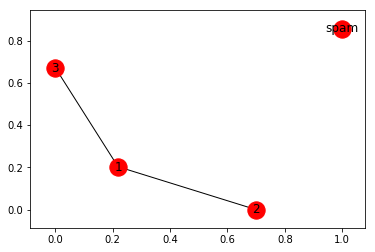

In [84]:
plt.show()

## Exploratory Data Analysis: Facebook graph
Now, let's consider a real-world dataset: 
<a href="https://snap.stanford.edu/data/egonets-Facebook.html">Facebook Ego Networks</a>!

This Facebook combined ego networks datasets contains the aggregated network of ten individuals' Facebook friends list. In this dataset, the vertices represent individuals on Facebook, and an edge between two users means they are Facebook friends. Each ego-network was created by starting with a Facebook user and then mining all of his Facebook friends. The ego-networks are then aggregated by identifying individuals who appear in multiple ego-networks.

In [85]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

In [16]:
#Quick snapshot of the Network
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [26]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G_fb)

In [27]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, linewidths=1, node_size = 35)

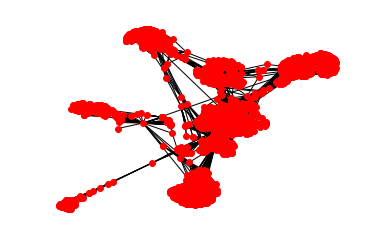

In [28]:
plt.show()

In [31]:
G_fb[594]

{414: {}, 428: {}, 563: {}, 667: {}, 3980: {}, 3989: {}, 4011: {}, 4031: {}}

In [33]:
G_fb[860]

{698: {}, 1684: {}}

In [36]:
# What is the average shortest path length?
nx.average_shortest_path_length(G_fb)

3.6925068496963913

Calculating that average shortest path length took a while. Can we do it faster?

In [39]:
import random
node_sample = random.sample(G_fb.nodes(), 100)

total = 0.0
for n1 in node_sample:
    for n2 in node_sample:
        if n1 != n2:
            total += nx.shortest_path_length(G_fb, n1, n2)
(total / (100 * 99))

3.6503030303030304